<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_4/ML_4th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Feature Engineering Assignment***
```
Use the Jeddah Airbnb dataset and prepare it for ML processing
```

Import needed libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction import *
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


Read and explore the data

In [2]:
df= pd.read_csv('https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_04/data/jeddah.csv')

In [3]:
df.shape

(5520, 40)

In [4]:
df.columns

Index(['ds', 'search_filter', 'url', 'title', 'type', 'location', 'guests',
       'bedrooms', 'beds', 'is_studio', 'baths', 'half_baths', 'shared_baths',
       'price', 'avg_rating', 'n_reviews', 'gym_bool', 'wifi_bool',
       'self_check_in_bool', 'air_conditioning_bool', 'pets_allowed_bool',
       'indoor_fireplace_bool', 'hot_tub_bool', 'free_parking_bool',
       'pool_bool', 'kitchen_bool', 'breakfast_bool', 'elevator_bool',
       'washer_bool', 'dryer_bool', 'heating_bool', 'waterfront_bool',
       'dishwasher_bool', 'beachfront_bool', 'ski_in_ski_out_bool',
       'terrace_bool', 'sonos_sound_system_bool', 'bbq_grill_bool',
       'hair_dryer_bool', 'chefs_kitchen_bool'],
      dtype='object')

In [5]:
df.sample(5)

,ds,search_filter,url,title,type,location,guests,bedrooms,beds,is_studio,baths,half_baths,shared_baths,price,avg_rating,n_reviews,gym_bool,wifi_bool,self_check_in_bool,air_conditioning_bool,pets_allowed_bool,indoor_fireplace_bool,hot_tub_bool,free_parking_bool,pool_bool,kitchen_bool,breakfast_bool,elevator_bool,washer_bool,dryer_bool,heating_bool,waterfront_bool,dishwasher_bool,beachfront_bool,ski_in_ski_out_bool,terrace_bool,sonos_sound_system_bool,bbq_grill_bool,hair_dryer_bool,chefs_kitchen_bool
1722,2021-01-21 04:39:16.835459,private_rooms,http://airbnb.com/rooms/43852439,Private room for females only غرفة للسيدات فقط,Private room,Jeddah,NaN,1,NaN,False,NaN,NaN,2.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,2021-01-20 04:14:42.520726,entire_homes,http://airbnb.com/rooms/23897791,Luxury VIP SUITE Apartment (Private Building),Entire apartment,Jeddah,2.0,1,2.0,False,1.0,NaN,NaN,92.0,4.90,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,2021-01-22 15:46:08.655236,NaN,http://airbnb.com/rooms/41293019,شقة مفروشة غرفة واحدةFurnished Apt 1 Bedroom,Entire apartment,Jeddah,0.0,1,0.0,False,1.0,NaN,NaN,45.0,4.00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5284,2021-01-26 05:19:37.149188,entire_home_super_hosts,http://airbnb.com/rooms/43852439,Private room for females only غرفة للسيدات فقط,Private room,Jeddah,NaN,1,NaN,False,NaN,NaN,2.0,13.0,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,2021-01-22 15:47:22.630607,private_rooms,http://airbnb.com/rooms/38813545,"Suite one large room but no kitchen, Alsafa9",Private room,Jeddah,6.0,1,6.0,False,NaN,NaN,NaN,13.0,4.75,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

ds                            0
search_filter              1800
url                           0
title                         0
type                          0
location                      0
guests                     2202
bedrooms                      0
beds                       2202
is_studio                     0
baths                       824
half_baths                 5490
shared_baths               5404
price                         0
avg_rating                 2871
n_reviews                  2871
gym_bool                   5269
wifi_bool                  3083
self_check_in_bool         4453
air_conditioning_bool      2009
pets_allowed_bool          5198
indoor_fireplace_bool      5345
hot_tub_bool               5465
free_parking_bool          4077
pool_bool                  5172
kitchen_bool               3202
breakfast_bool             5412
elevator_bool              4987
washer_bool                4227
dryer_bool                 4775
heating_bool               5520
waterfro

After exploring the dataset,summarize what you found:
- Is there any null valu? How that affect the dataset?
- How do you plane to work on it?
- Will you consider all features or prefer to execlude some of them? Why? 

```
Well, as I saw there are 5200 records in the dataset and under 40 features and there are numaric data and catigorical data.

It is noticable that in 'Title' feature there are some records written in Arabic while the other in English language. I believe that needs a lot of time and high advance skills to standrize languages befre converting categorical data into numircal data (0,1) to fit it in ML model at least in this time.

In addition, as shown in above outpot, most of the features have numbers of null values and some of them have no value at all! That is interesting and in the same time effect the analysis in somehow as the majoraty of the observations is null.

I think that I should delete all features that null values amount is more than %10 of the total records (5200) and I should convert 'Type' feature to numarical data.

Furthermore, 'Title' feature will be exludeded from the dataframe for the reason mentioned above and 'Location' feature will be execlueded too as all data are 'Jeddah'. Also, 'Url' and 'search_filter' features will not be inclueded as there is no need for it.
```

Eliminate undesired features

In [7]:
df=df.drop(['search_filter','title','location','url'],axis=1)
df.columns

Index(['ds', 'type', 'guests', 'bedrooms', 'beds', 'is_studio', 'baths',
       'half_baths', 'shared_baths', 'price', 'avg_rating', 'n_reviews',
       'gym_bool', 'wifi_bool', 'self_check_in_bool', 'air_conditioning_bool',
       'pets_allowed_bool', 'indoor_fireplace_bool', 'hot_tub_bool',
       'free_parking_bool', 'pool_bool', 'kitchen_bool', 'breakfast_bool',
       'elevator_bool', 'washer_bool', 'dryer_bool', 'heating_bool',
       'waterfront_bool', 'dishwasher_bool', 'beachfront_bool',
       'ski_in_ski_out_bool', 'terrace_bool', 'sonos_sound_system_bool',
       'bbq_grill_bool', 'hair_dryer_bool', 'chefs_kitchen_bool'],
      dtype='object')

Eliminate features that contain null values over %90 of total records

In [8]:
#finding features
de=[i for i in df.columns if df[i].isnull().sum()>(df.shape[0]-(0.1 * df.shape[0]))]
de

['half_baths',
 'shared_baths',
 'gym_bool',
 'pets_allowed_bool',
 'indoor_fireplace_bool',
 'hot_tub_bool',
 'pool_bool',
 'breakfast_bool',
 'elevator_bool',
 'heating_bool',
 'waterfront_bool',
 'dishwasher_bool',
 'beachfront_bool',
 'ski_in_ski_out_bool',
 'terrace_bool',
 'sonos_sound_system_bool',
 'bbq_grill_bool',
 'hair_dryer_bool',
 'chefs_kitchen_bool']

In [9]:
#eliminating features
df=df.drop(de,axis=1)
df

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,air_conditioning_bool,free_parking_bool,kitchen_bool,washer_bool,dryer_bool
0,2021-01-20 04:13:49.541603,Entire loft,NaN,1,NaN,False,1.5,343.0,5.00,12.0,NaN,True,NaN,NaN,NaN,NaN,NaN
1,2021-01-20 04:13:49.541603,Entire apartment,3.0,1,3.0,False,1.5,147.0,4.79,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-20 04:13:49.541603,Entire condominium,2.0,2,2.0,False,2.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-20 04:13:49.541603,Entire apartment,2.0,2,2.0,False,1.0,70.0,4.71,7.0,NaN,True,NaN,NaN,NaN,NaN,NaN
4,2021-01-20 04:13:49.541603,Entire serviced apartment,2.0,1,2.0,False,1.0,92.0,4.90,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,2.5,202.0,NaN,NaN,NaN,NaN,True,NaN,True,True,NaN
5516,2021-01-26 05:20:12.672633,Private room,NaN,2,NaN,False,NaN,59.0,4.67,9.0,True,NaN,True,NaN,NaN,True,True
5517,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,1.0,53.0,NaN,NaN,NaN,NaN,True,NaN,True,True,NaN
5518,2021-01-26 05:20:12.672633,Entire apartment,0.0,2,0.0,False,1.0,57.0,5.00,5.0,True,NaN,True,NaN,True,True,NaN


In [10]:
df.isnull().sum()

ds                          0
type                        0
guests                   2202
bedrooms                    0
beds                     2202
is_studio                   0
baths                     824
price                       0
avg_rating               2871
n_reviews                2871
wifi_bool                3083
self_check_in_bool       4453
air_conditioning_bool    2009
free_parking_bool        4077
kitchen_bool             3202
washer_bool              4227
dryer_bool               4775
dtype: int64

In [11]:


dum=pd.get_dummies(df.iloc[:,1:])



In [12]:
cor=dum.corr()
cor

,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,type_Cycladic house,type_Earth house,type_Entire apartment,type_Entire bungalow,type_Entire chalet,type_Entire condominium,type_Entire cottage,type_Entire guest suite,type_Entire house,type_Entire loft,type_Entire place,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Farm stay,type_Hotel room,type_Private room,type_Resort room,type_Room,type_Shared room,type_Tiny house,wifi_bool_True,self_check_in_bool_True,air_conditioning_bool_1.0,air_conditioning_bool_True,free_parking_bool_True,kitchen_bool_True,washer_bool_True,dryer_bool_True
guests,1.000000,0.480509,1.000000,-0.134015,0.523599,0.110008,0.224773,-0.035943,NaN,NaN,0.052682,0.018463,0.028946,-0.088149,NaN,-0.044030,0.010125,-0.056234,0.082611,-0.031624,-0.065709,0.174963,-0.067382,-0.090812,0.073555,0.061381,-0.175667,NaN,-0.021231,-0.038192,-0.082565,-0.010485,-0.065353,-0.011597,0.009807,0.044849,0.045796
bedrooms,0.480509,1.000000,0.480509,-0.481094,0.638853,0.100811,0.260538,-0.156691,-0.016553,-0.067367,0.047952,0.025928,0.012230,0.002939,-0.061486,-0.002236,0.057837,-0.027952,0.013217,-0.019152,-0.003749,0.292114,-0.051429,-0.114485,-0.171633,-0.064410,0.062056,-0.033170,-0.021683,-0.067376,-0.069345,-0.028013,0.005899,0.001654,0.038364,0.112740,0.086865
beds,1.000000,0.480509,1.000000,-0.134015,0.523599,0.110008,0.224773,-0.035943,NaN,NaN,0.052682,0.018463,0.028946,-0.088149,NaN,-0.044030,0.010125,-0.056234,0.082611,-0.031624,-0.065709,0.174963,-0.067382,-0.090812,0.073555,0.061381,-0.175667,NaN,-0.021231,-0.038192,-0.082565,-0.010485,-0.065353,-0.011597,0.009807,0.044849,0.045796
is_studio,-0.134015,-0.481094,-0.134015,1.000000,-0.096979,0.013598,-0.284120,-0.077069,-0.011878,0.140028,-0.021681,-0.016808,0.046836,-0.028766,0.127804,-0.032189,-0.061375,-0.047416,0.005800,-0.060311,-0.022027,-0.063277,0.106900,0.107500,0.097892,0.103706,-0.066125,-0.023801,-0.015559,0.094003,0.041748,0.020101,-0.018912,0.020202,-0.010767,-0.081699,-0.087482
baths,0.523599,0.638853,0.523599,-0.096979,1.000000,0.108173,0.148865,-0.185381,NaN,0.243913,-0.227516,0.085694,0.121119,-0.022085,0.005054,-0.070784,0.042743,-0.046853,0.047120,-0.059766,0.053550,0.499993,0.004227,-0.037708,-0.019209,0.101219,0.000136,NaN,0.045267,-0.061454,-0.163628,-0.028574,-0.022390,-0.073916,0.048834,0.032341,0.055700
price,0.110008,0.100811,0.110008,0.013598,0.108173,1.000000,0.157352,-0.102437,-0.007779,0.003452,-0.144466,0.008823,-0.003600,-0.028062,-0.002190,-0.017947,-0.008551,-0.019833,0.004951,0.443611,-0.008611,0.016223,-0.004277,-0.000138,-0.062910,0.001432,-0.036618,-0.008853,-0.005325,0.101677,-0.079387,-0.011531,0.033542,-0.069177,0.005852,0.010057,0.050214
avg_rating,0.224773,0.260538,0.224773,-0.284120,0.148865,0.157352,1.000000,0.075460,NaN,NaN,-0.142282,NaN,NaN,0.035026,NaN,NaN,0.054184,0.036893,NaN,0.164114,0.014847,0.093877,NaN,-0.025632,-0.038849,NaN,0.025226,-0.099891,NaN,0.122003,0.054985,-0.053635,-0.003433,-0.068332,-0.051319,0.106835,0.052531
n_reviews,-0.035943,-0.156691,-0.035943,-0.077069,-0.185381,-0.102437,0.075460,1.000000,NaN,NaN,0.091624,NaN,NaN,-0.067759,NaN,NaN,0.051234,-0.007664,NaN,0.153267,0.009473,-0.087583,NaN,-0.042530,-0.185318,NaN,-0.056110,-0.049136,NaN,0.117283,0.020628,0.011078,0.002984,-0.018975,-0.042031,0.027902,0.025203
type_Cycladic house,NaN,-0.016553,NaN,-0.011878,NaN,-0.007779,NaN,NaN,1.000000,-0.001663,-0.040598,-0.001797,-0.004096,-0.006409,-0.001518,-0.003441,-0.006561,-0.005873,-0.001860,-0.009342,-0.002355,-0.006764,-0.001270,-0.006783,-0.013165,-0.002967,-0.007069,-0.002544,-0.001663,0.040079,-0.017443,-0.002149,0.006050,-0.021199,0.021252,-0.019708,-0.014075
type_Earth house,NaN,-0.067367,NaN,0.140028,0.243913,0.003452,NaN,NaN,-0.001663,1.000000,-0.053180,-0.002354,-0.005366,-0.008396,-0.001988,-0.004507,-0.008594,-0.007693,-0.002436,-0.012237,-0.003084,-0.008861,-0.001663,-0.008884,-0.017245,-0.003886,-0.009259,-0.003333,-0.002179,-0.041499,-0.022848,-0.002

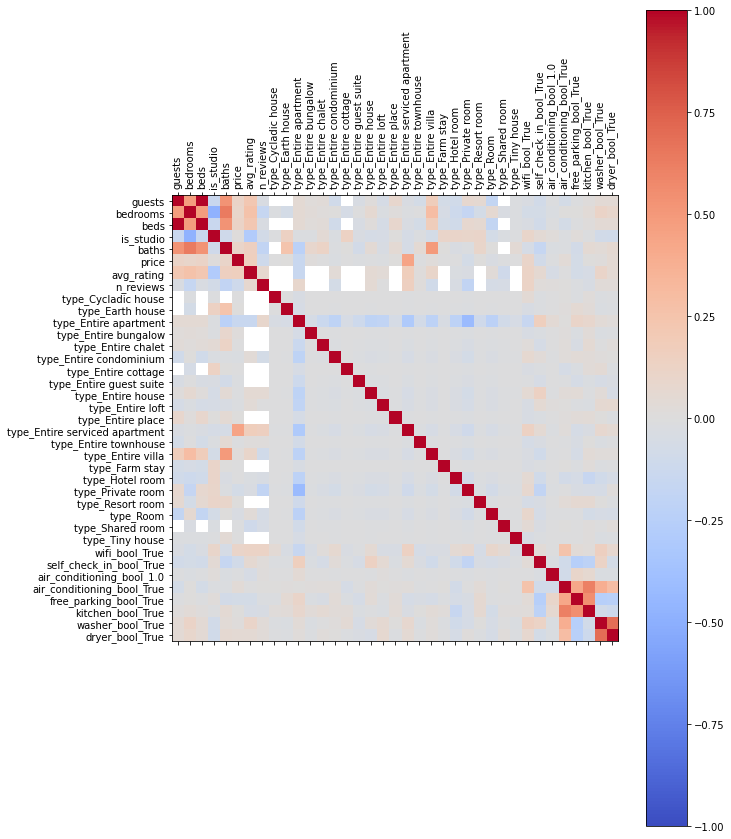

In [13]:

fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dum.columns)
ax.set_yticklabels(dum.columns)
plt.show()

That is weird, some type shows null values and should be removed

In [14]:
df=df[(df.type != 'Cycladic house') &
      (df.type!= 'Earth house') &
      (df.type!= 'Entire cottage') &
      (df.type!= 'Shared room')&
      (df.type!= 'Entire bungalow')&
      (df.type!= 'Entire chalet')&
      (df.type!= 'Entire guest suite')&
      (df.type!= 'Entire place')&
      (df.type!= 'Farm stay')&
      (df.type!= 'Resort room')&
      (df.type!= 'Tiny house')
     ]

In [15]:
df.shape

(5254, 17)

In [16]:
dum=pd.get_dummies(df.iloc[:,1:])
cor=dum.corr()
cor

,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,type_Entire apartment,type_Entire condominium,type_Entire house,type_Entire loft,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Hotel room,type_Private room,type_Room,wifi_bool_True,self_check_in_bool_True,air_conditioning_bool_1.0,air_conditioning_bool_True,free_parking_bool_True,kitchen_bool_True,washer_bool_True,dryer_bool_True
guests,1.000000,0.491130,1.000000,-0.138610,0.530464,0.109230,0.224773,-0.035943,0.064988,-0.088992,0.011815,-0.056385,-0.030257,-0.066772,0.181405,-0.092164,0.076985,-0.178868,-0.042600,-0.081598,-0.010400,-0.074835,-0.020610,0.003945,0.042390,0.041973
bedrooms,0.491130,1.000000,0.491130,-0.463628,0.703860,0.101717,0.258471,-0.158713,0.033299,0.000357,0.056338,-0.030951,-0.023423,-0.004795,0.295434,-0.119676,-0.181112,0.060445,-0.084628,-0.078392,-0.029461,0.003000,0.014631,0.051622,0.113956,0.084593
beds,1.000000,0.491130,1.000000,-0.138610,0.530464,0.109230,0.224773,-0.035943,0.064988,-0.088992,0.011815,-0.056385,-0.030257,-0.066772,0.181405,-0.092164,0.076985,-0.178868,-0.042600,-0.081598,-0.010400,-0.074835,-0.020610,0.003945,0.042390,0.041973
is_studio,-0.138610,-0.463628,-0.138610,1.000000,-0.155847,0.014036,-0.287895,-0.078296,0.006666,-0.025877,-0.060374,-0.046051,-0.057278,-0.021652,-0.062249,0.119013,0.113738,-0.065056,0.136446,0.057261,0.022874,-0.019155,-0.002739,-0.033631,-0.084684,-0.087669
baths,0.530464,0.703860,0.530464,-0.155847,1.000000,0.113044,0.148865,-0.185381,-0.195421,-0.015700,0.053419,-0.042686,-0.052223,0.059748,0.539670,-0.035624,-0.011275,0.003831,-0.047400,-0.153514,-0.027825,-0.035238,-0.087704,0.022557,0.040407,0.066163
price,0.109230,0.101717,0.109230,0.014036,0.113044,1.000000,0.152080,-0.105896,-0.152674,-0.028578,-0.009055,-0.020296,0.443869,-0.008792,0.015737,-0.000648,-0.064146,-0.037201,0.104458,-0.081224,-0.011698,0.033843,-0.072447,0.005484,0.009636,0.050885
avg_rating,0.224773,0.258471,0.224773,-0.287895,0.148865,0.152080,1.000000,0.070992,-0.154086,0.034110,0.052961,0.035469,0.162944,0.014300,0.092902,-0.026255,-0.041386,0.024654,0.130183,0.050218,-0.054439,-0.001214,-0.068554,-0.046124,0.103292,0.049791
n_reviews,-0.035943,-0.158713,-0.035943,-0.078296,-0.185381,-0.105896,0.070992,1.000000,0.087156,-0.068381,0.050566,-0.008465,0.152490,0.009180,-0.088412,-0.042824,-0.186735,-0.056523,0.121319,0.018173,0.010830,0.004094,-0.018898,-0.039468,0.025916,0.023761
type_Entire apartment,0.064988,0.033299,0.064988,0.006666,-0.195421,-0.152674,-0.154086,0.087156,1.000000,-0.222939,-0.228215,-0.204262,-0.325235,-0.081845,-0.235303,-0.235938,-0.459135,-0.245912,-0.177254,0.135606,0.044871,0.007941,0.099355,0.112728,0.025101,0.010049
type_Entire condominium,-0.088992,0.000357,-0.088992,-0.025877,-0.015700,-0.028578,0.034110,-0.068381,-0.222939,1.000000,-0.034854,-0.031196,-0.049672,-0.012500,-0.035937,-0.036034,-0.070122,-0.037557,0.067979,0.026159,-0.011406,0.019694,0.034412,0.030082,0.007032,0.003695


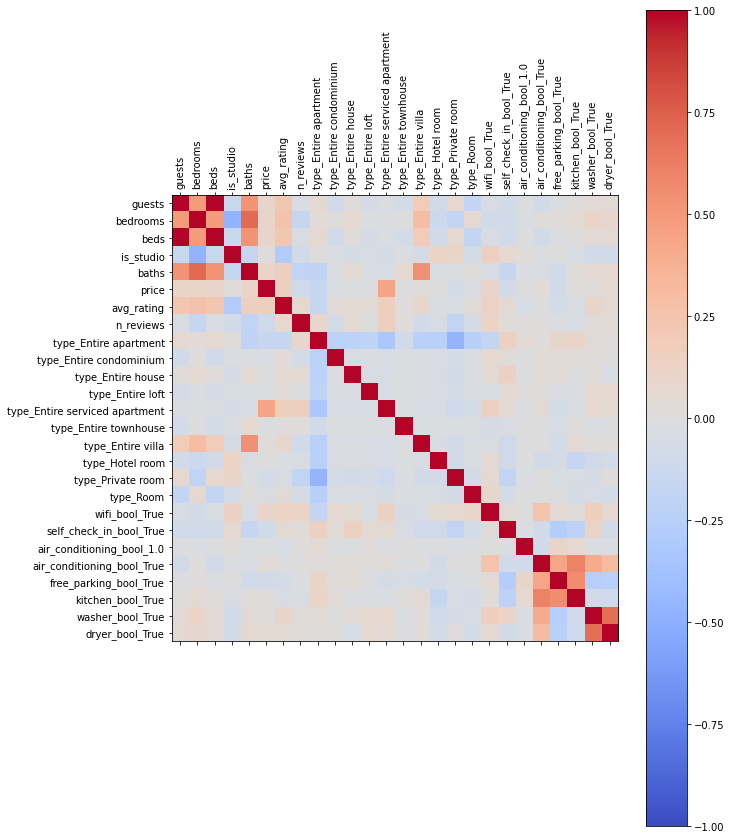

In [17]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dum.columns)
ax.set_yticklabels(dum.columns)
plt.show()

In [18]:
#Exploring values of boolen features
{i:[df[i].value_counts()] for i in df.columns[-7:]}

{'air_conditioning_bool': [True    3313
  1.0       20
  Name: air_conditioning_bool, dtype: int64], 'dryer_bool': [True    723
  Name: dryer_bool, dtype: int64], 'free_parking_bool': [True    1390
  Name: free_parking_bool, dtype: int64], 'kitchen_bool': [True    2160
  Name: kitchen_bool, dtype: int64], 'self_check_in_bool': [True    1067
  Name: self_check_in_bool, dtype: int64], 'washer_bool': [True    1251
  Name: washer_bool, dtype: int64], 'wifi_bool': [True    2348
  Name: wifi_bool, dtype: int64]}

**ALL OF THEM ARE ONLY TRUE!!**

Filling NA of some features using expert knowledge:
- Wifi
- Self check in
- Air condition
- Free parking
- Kitchen
- Washer
- Dryer

In [19]:
df['air_conditioning_bool']=True
df['free_parking_bool']=True
df['wifi_bool'].fillna(False,inplace=True)
df['self_check_in_bool'].fillna(False, inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,air_conditioning_bool,free_parking_bool,kitchen_bool,washer_bool,dryer_bool
0,2021-01-20 04:13:49.541603,Entire loft,NaN,1,NaN,False,1.5,343.0,5.00,12.0,False,True,True,True,NaN,NaN,NaN
1,2021-01-20 04:13:49.541603,Entire apartment,3.0,1,3.0,False,1.5,147.0,4.79,75.0,False,False,True,True,NaN,NaN,NaN
2,2021-01-20 04:13:49.541603,Entire condominium,2.0,2,2.0,False,2.0,147.0,NaN,NaN,False,False,True,True,NaN,NaN,NaN
3,2021-01-20 04:13:49.541603,Entire apartment,2.0,2,2.0,False,1.0,70.0,4.71,7.0,False,True,True,True,NaN,NaN,NaN
4,2021-01-20 04:13:49.541603,Entire serviced apartment,2.0,1,2.0,False,1.0,92.0,4.90,21.0,False,False,True,True,NaN,NaN,NaN


In [20]:
df.isnull().sum()

ds                          0
type                        0
guests                   2119
bedrooms                    0
beds                     2119
is_studio                   0
baths                     766
price                       0
avg_rating               2619
n_reviews                2619
wifi_bool                   0
self_check_in_bool          0
air_conditioning_bool       0
free_parking_bool           0
kitchen_bool             3094
washer_bool              4003
dryer_bool               4531
dtype: int64

In [21]:
dum=pd.get_dummies(df.iloc[:,1:])
cor=dum.corr()

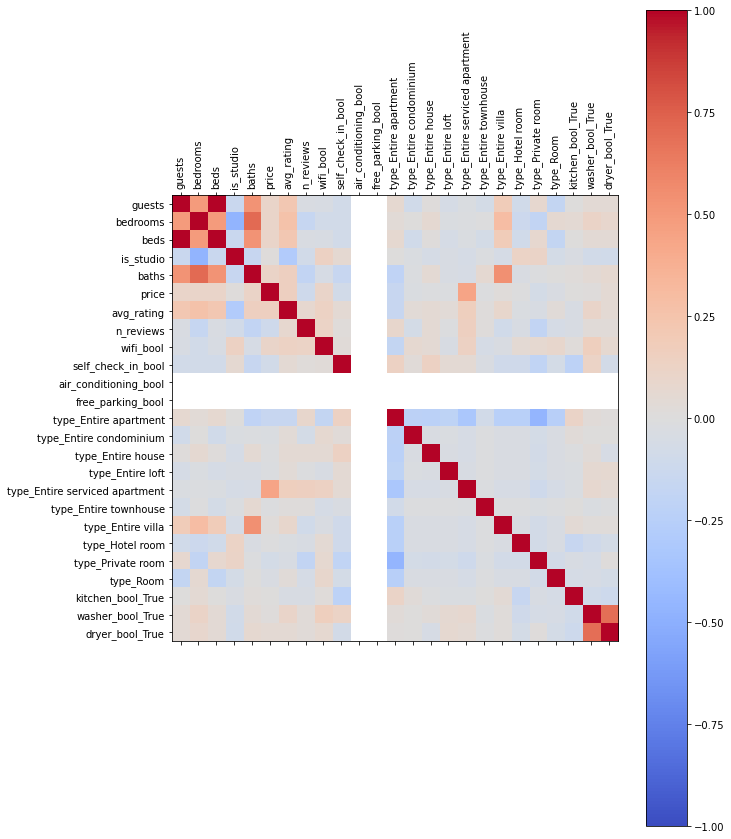

In [22]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dum.columns)
ax.set_yticklabels(dum.columns)
plt.show()

we noticed now that 'air condition' and 'free parking' disapeared in the chart as they have one value for all observations, that means it will not effect the model so no need for them and they should be deleted

In [23]:
df=df.drop(['air_conditioning_bool','free_parking_bool'],axis=1)
df.columns

Index(['ds', 'type', 'guests', 'bedrooms', 'beds', 'is_studio', 'baths',
       'price', 'avg_rating', 'n_reviews', 'wifi_bool', 'self_check_in_bool',
       'kitchen_bool', 'washer_bool', 'dryer_bool'],
      dtype='object')

In [24]:
dum=pd.get_dummies(df.iloc[:,1:])
cor=dum.corr()

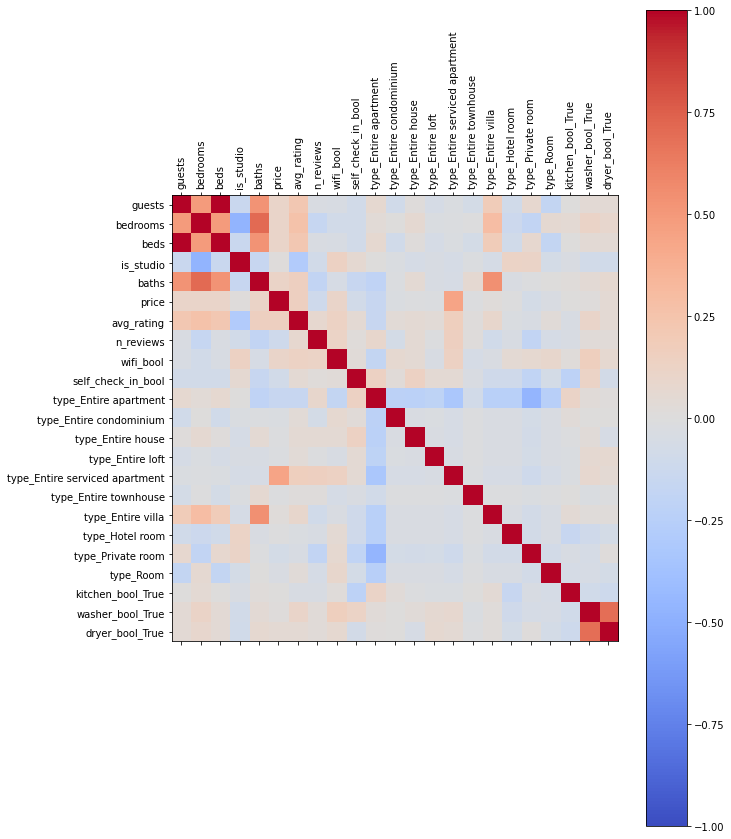

In [25]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dum.columns)
ax.set_yticklabels(dum.columns)
plt.show()

As we notice here there are strong correlation between 'guests' and 'beds'  and is also good correlation between 'dryer' and 'washer'. 
I will use that to fill missing values.


I will start with 'dryer' and 'washer' and to make sure with the correlation, I will check and explor both of them in different situations.

In [26]:
df[(df['dryer_bool']==True)&(df['washer_bool'].isnull()==False)]

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,kitchen_bool,washer_bool,dryer_bool
60,2021-01-20 04:13:57.538588,Entire villa,3.0,2,3.0,False,5.5,189.0,4.88,17.0,True,False,NaN,True,True
65,2021-01-20 04:13:57.538588,Entire apartment,4.0,2,4.0,False,2.0,43.0,4.67,3.0,True,False,NaN,True,True
70,2021-01-20 04:13:57.538588,Entire serviced apartment,2.0,1,2.0,False,1.0,93.0,4.81,16.0,True,False,NaN,True,True
71,2021-01-20 04:13:57.538588,Entire apartment,NaN,1,NaN,False,1.0,92.0,4.94,16.0,True,False,NaN,True,True
75,2021-01-20 04:13:57.538588,Entire condominium,3.0,3,3.0,False,2.5,200.0,5.00,3.0,True,False,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,2021-01-26 05:20:10.419051,Entire apartment,NaN,2,NaN,False,2.0,32.0,NaN,NaN,False,False,True,True,True
5498,2021-01-26 05:20:10.419051,Entire apartment,3.0,2,3.0,False,2.0,53.0,4.89,9.0,False,True,NaN,True,True
5509,2021-01-26 05:20:12.672633,Entire villa,3.0,2,3.0,False,5.5,189.0,4.88,17.0,True,False,NaN,True,True
5511,2021-01-26 05:20:12.672633,Entire apartment,4.0,3,4.0,False,2.0,53.0,NaN,NaN,False,False,True,True,True


In [27]:
df[(df['dryer_bool']==True)&(df['washer_bool'].isnull()==True)]

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,kitchen_bool,washer_bool,dryer_bool
767,2021-01-20 04:15:37.692055,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
854,2021-01-20 04:15:51.614788,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
882,2021-01-20 04:15:57.933418,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
1199,2021-01-21 04:38:15.455800,Entire house,3.0,3,3.0,False,8.0,1024.0,NaN,NaN,True,False,NaN,NaN,True
1261,2021-01-21 04:38:25.875049,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
1760,2021-01-21 04:39:22.547024,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
2238,2021-01-22 15:46:37.619131,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
2478,2021-01-22 15:47:05.741593,Entire house,3.0,3,3.0,False,8.0,1024.0,NaN,NaN,True,False,NaN,NaN,True
2803,2021-01-23 17:17:08.833192,Private room,NaN,1,NaN,False,NaN,13.0,NaN,NaN,True,False,True,NaN,True
3030,2021-01-23 17:17:31.553402,Entire house,3.0,3,3.0,False,8.0,1024.0,NaN,NaN,True,False,NaN,NaN,True


In [28]:
df[(df['dryer_bool'].isnull()==True)&(df['washer_bool']==True)]

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,kitchen_bool,washer_bool,dryer_bool
31,2021-01-20 04:13:52.067842,Entire apartment,3.0,2,3.0,False,1.0,43.0,NaN,NaN,False,False,True,True,NaN
62,2021-01-20 04:13:57.538588,Entire house,2.0,2,2.0,False,2.0,109.0,4.67,15.0,True,True,NaN,True,NaN
63,2021-01-20 04:13:57.538588,Entire loft,2.0,1,2.0,False,2.0,347.0,4.25,4.0,True,False,NaN,True,NaN
64,2021-01-20 04:13:57.538588,Entire house,2.0,2,2.0,False,1.0,173.0,NaN,NaN,True,True,NaN,True,NaN
67,2021-01-20 04:13:57.538588,Entire apartment,3.0,2,3.0,False,1.0,53.0,NaN,NaN,False,False,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,2021-01-26 05:20:12.672633,Entire serviced apartment,2.0,1,2.0,False,1.0,84.0,5.00,23.0,True,True,NaN,True,NaN
5514,2021-01-26 05:20:12.672633,Entire apartment,NaN,1,NaN,False,1.5,159.0,5.00,4.0,True,True,NaN,True,NaN
5515,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,2.5,202.0,NaN,NaN,False,False,True,True,NaN
5517,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,1.0,53.0,NaN,NaN,False,False,True,True,NaN


Now it is clear that there is a strong correlation between them, so I will fill mising data based on this.

In [29]:
df.loc[df['washer_bool']==True, 'dryer_bool'] = True
df.loc[df['dryer_bool']==True, 'washer_bool'] = True
df.loc[df['washer_bool']==False, 'dryer_bool'] = False
df.loc[df['dryer_bool']==False, 'washer_bool'] = False
df

,ds,type,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,kitchen_bool,washer_bool,dryer_bool
0,2021-01-20 04:13:49.541603,Entire loft,NaN,1,NaN,False,1.5,343.0,5.00,12.0,False,True,NaN,NaN,NaN
1,2021-01-20 04:13:49.541603,Entire apartment,3.0,1,3.0,False,1.5,147.0,4.79,75.0,False,False,NaN,NaN,NaN
2,2021-01-20 04:13:49.541603,Entire condominium,2.0,2,2.0,False,2.0,147.0,NaN,NaN,False,False,NaN,NaN,NaN
3,2021-01-20 04:13:49.541603,Entire apartment,2.0,2,2.0,False,1.0,70.0,4.71,7.0,False,True,NaN,NaN,NaN
4,2021-01-20 04:13:49.541603,Entire serviced apartment,2.0,1,2.0,False,1.0,92.0,4.90,21.0,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,2.5,202.0,NaN,NaN,False,False,True,True,True
5516,2021-01-26 05:20:12.672633,Private room,NaN,2,NaN,False,NaN,59.0,4.67,9.0,True,False,NaN,True,True
5517,2021-01-26 05:20:12.672633,Entire apartment,3.0,2,3.0,False,1.0,53.0,NaN,NaN,False,False,True,True,True
5518,2021-01-26 05:20:12.672633,Entire apartment,0.0,2,0.0,False,1.0,57.0,5.00,5.0,True,False,True,True,True


Now I need to check for other corellations after the correction so we can fill the mising value for both of them or alternativly I will check how many records with null values if they are a few I will delete them

In [30]:
dum=pd.get_dummies(df.iloc[:,1:])
cor=dum.corr()

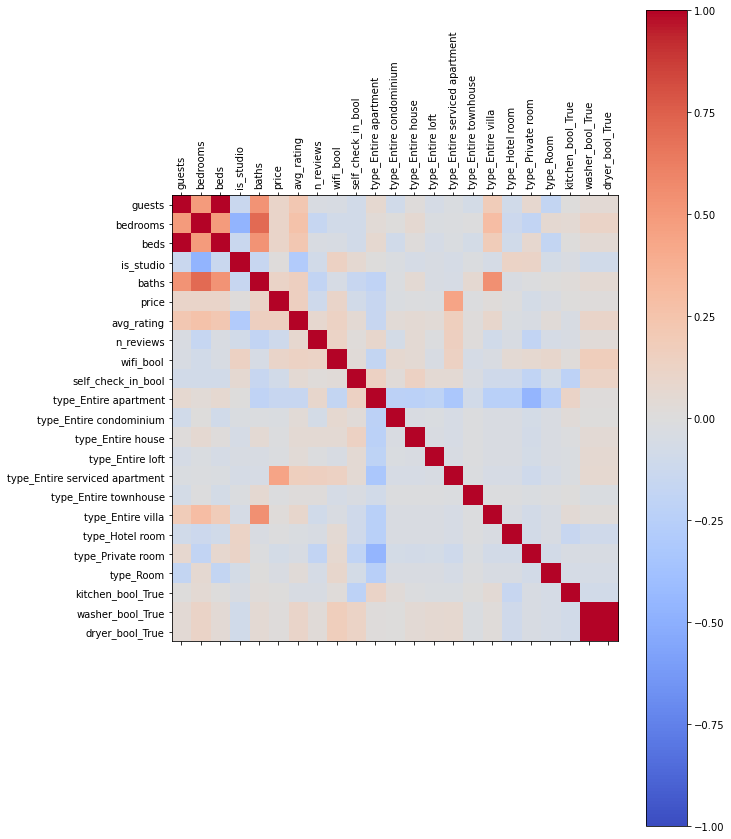

In [31]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cor,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dum.columns)
ax.set_yticklabels(dum.columns)
plt.show()

In [32]:
df['washer_bool'].isnull().sum()

3984

In [33]:
df['dryer_bool']=df['dryer_bool'].fillna(False)
df['washer_bool']=df['washer_bool'].fillna(False)
df['kitchen_bool']=df['kitchen_bool'].fillna(False)

In [34]:

df.isnull().sum()

ds                       0
type                     0
guests                2119
bedrooms                 0
beds                  2119
is_studio                0
baths                  766
price                    0
avg_rating            2619
n_reviews             2619
wifi_bool                0
self_check_in_bool       0
kitchen_bool             0
washer_bool              0
dryer_bool               0
dtype: int64

In [35]:
df['guests']=df['guests'].fillna(np.mean(df['guests']))
df['beds']=df['beds'].fillna(np.mean(df['beds']))
df['baths']=df['baths'].fillna(np.mean(df['baths']))
df['avg_rating']=df['avg_rating'].fillna(np.mean(df['avg_rating']))
df['n_reviews']=df['n_reviews'].fillna(np.mean(df['n_reviews']))

In [36]:

df.isnull().sum()

ds                    0
type                  0
guests                0
bedrooms              0
beds                  0
is_studio             0
baths                 0
price                 0
avg_rating            0
n_reviews             0
wifi_bool             0
self_check_in_bool    0
kitchen_bool          0
washer_bool           0
dryer_bool            0
dtype: int64

Ok now all features are clean.
The next step is to vectorize them using dummy function.

In [37]:
df=pd.get_dummies(df.iloc[:,1:])

In [38]:
df

,guests,bedrooms,beds,is_studio,baths,price,avg_rating,n_reviews,wifi_bool,self_check_in_bool,kitchen_bool,washer_bool,dryer_bool,type_Entire apartment,type_Entire condominium,type_Entire house,type_Entire loft,type_Entire serviced apartment,type_Entire townhouse,type_Entire villa,type_Hotel room,type_Private room,type_Room
0,2.620734,1,2.620734,False,1.500000,343.0,5.000000,12.000000,False,True,False,False,False,0,0,0,1,0,0,0,0,0,0
1,3.000000,1,3.000000,False,1.500000,147.0,4.790000,75.000000,False,False,False,False,False,1,0,0,0,0,0,0,0,0,0
2,2.000000,2,2.000000,False,2.000000,147.0,4.713662,19.528273,False,False,False,False,False,0,1,0,0,0,0,0,0,0,0
3,2.000000,2,2.000000,False,1.000000,70.0,4.710000,7.000000,False,True,False,False,False,1,0,0,0,0,0,0,0,0,0
4,2.000000,1,2.000000,False,1.000000,92.0,4.900000,21.000000,False,False,False,False,False,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,3.000000,2,3.000000,False,2.500000,202.0,4.713662,19.528273,False,False,True,True,True,1,0,0,0,0,0,0,0,0,0
5516,2.620734,2,2.620734,False,1.812946,59.0,4.670000,9.000000,True,False,False,True,True,0,0,0,0,0,0,0,0,1,0
5517,3.000000,2,3.000000,False,1.000000,53.0,4.713662,19.528273,False,False,True,True,True,1,0,0,0,0,0,0,0,0,0
5518,0.000000,2,0.000000,False,1.000000,57.0,5.000000,5.000000,True,False,True,True,True,1,0,0,0,0,0,0,0,0,0
